<a href="https://colab.research.google.com/github/Sivabalan10/Time_series_analysis/blob/main/TSA_9_221501138.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)


date_range = pd.date_range(start='2010-01-01', end='2024-12-01', freq='MS')
n = len(date_range)


passengers = (
    100 + 2 * np.arange(n) +                       # Upward trend
    20 * np.sin(2 * np.pi * np.arange(n) / 12) +   # Seasonality (12 months)
    np.random.normal(0, 10, n)                     # Random noise
)

df = pd.DataFrame({'date': date_range, 'passengers': passengers})
df.set_index('date', inplace=True)

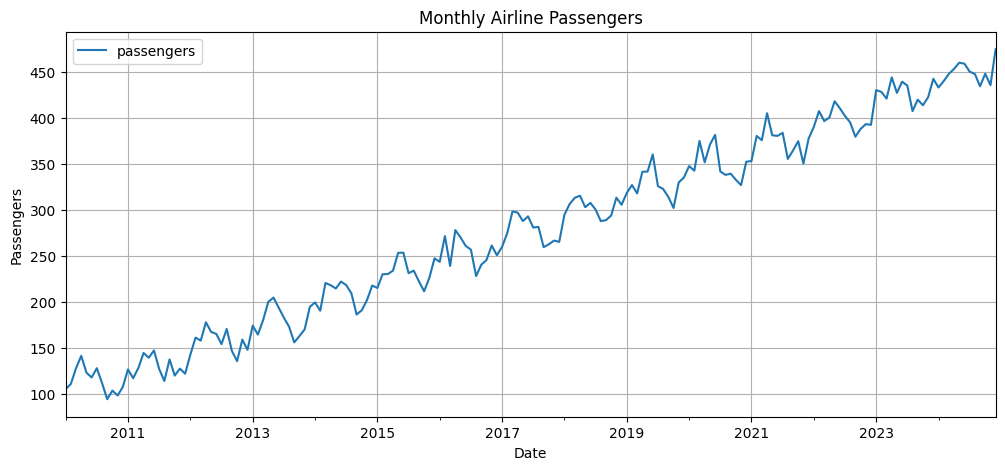

In [ ]:
df.plot(figsize=(12, 5), title="Monthly Airline Passengers")
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [ ]:
# Normalization

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# lagged features
def create_dataset(data, look_back=12):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=12)

split = int(len(X) * 0.8) # splitting dataset
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
y

array([0.08508246, 0.06002474, 0.08941518, 0.13218819, 0.1185872 ,
       0.13944219, 0.08639441, 0.05218083, 0.11371801, 0.06756649,
       0.08753553, 0.07283981, 0.12741151, 0.17607947, 0.16742651,
       0.2197495 , 0.19235602, 0.18650355, 0.15738594, 0.20077291,
       0.13787365, 0.10869964, 0.17029724, 0.14114487, 0.21012678,
       0.18472041, 0.22573472, 0.27801457, 0.29043941, 0.26160677,
       0.23309239, 0.20724214, 0.16239972, 0.18051876, 0.19959332,
       0.26385625, 0.27661791, 0.25283464, 0.33203298, 0.32570543,
       0.31626753, 0.33611312, 0.32612729, 0.30252604, 0.24212609,
       0.25424664, 0.28332261, 0.32467262, 0.31799088, 0.35716844,
       0.35746682, 0.36738447, 0.41829468, 0.41860063, 0.36014966,
       0.36737764, 0.3365829 , 0.30839147, 0.34706931, 0.40238405,
       0.39257697, 0.46603828, 0.38072366, 0.48327935, 0.46222035,
       0.43813682, 0.42740194, 0.35187199, 0.38429043, 0.39763809,
       0.43931333, 0.41139974, 0.4352648 , 0.47478918, 0.53641

In [ ]:
model = Sequential([
    Dense(64, input_dim=12, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3281 - val_loss: 0.2439
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0419 - val_loss: 0.0041
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - val_loss: 0.0214
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120 - val_loss: 0.0051
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037 - val_loss: 0.0054
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 0.0085
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 0.0015
E

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.8405759 ],
       [0.82315135],
       [0.8234275 ],
       [0.8237166 ],
       [0.8091386 ],
       [0.78471607],
       [0.7926827 ],
       [0.76050943],
       [0.7813078 ],
       [0.82012373],
       [0.84362036],
       [0.86955553],
       [0.8810539 ],
       [0.8910072 ],
       [0.90784055],
       [0.8871895 ],
       [0.8740855 ],
       [0.85856086],
       [0.8319396 ],
       [0.845306  ],
       [0.85810095],
       [0.89275944],
       [0.93303365],
       [0.9298395 ],
       [0.94379467],
       [0.95313084],
       [0.9597346 ],
       [0.9637258 ],
       [0.9402584 ],
       [0.9219341 ],
       [0.92520374],
       [0.9168957 ],
       [0.94805044],
       [0.94514453]], dtype=float32)

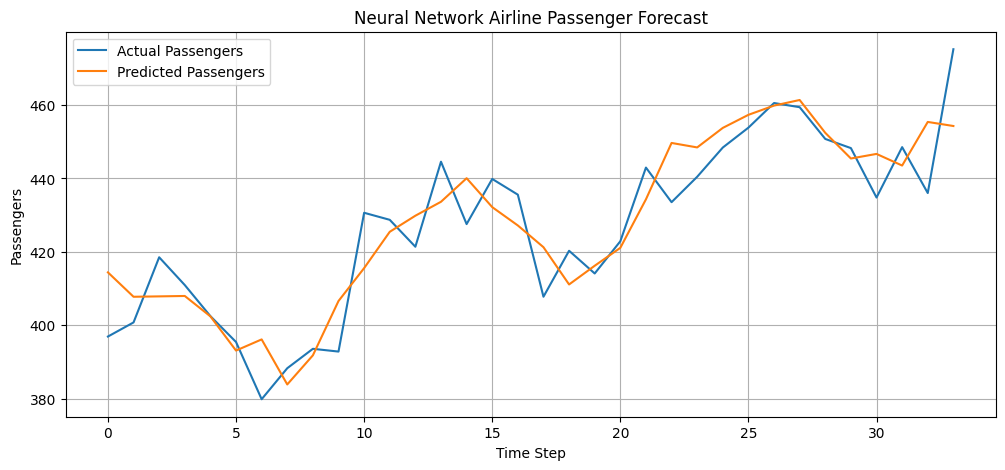

Test RMSE: 9.97 Passengers


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual Passengers')
plt.plot(y_pred_inv, label='Predicted Passengers')
plt.title("Neural Network Airline Passenger Forecast")
plt.xlabel("Time Step")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Test RMSE: {rmse:.2f} Passengers")